In [6]:
import numpy as np
import tensorflow as tf

# Zad.
Wczytaj dane i narysuj je na wykresie.

In [14]:
data = np.loadtxt("life_satisfaction.csv",
                  dtype=np.float32,
                  delimiter=",",
                  skiprows=1,
                  usecols=[1, 2])
X_train = data[:, 0:1] / 10000 # feature scaling
y_train = data[:, 1:2]

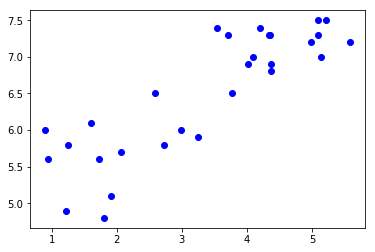

(29, 1)


In [15]:
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, "bo")
plt.show()
print(X_train.shape)

# Zad 
Wykonaj regresię za pomocą Scikit-Learn.

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

[[4.853052  ]
 [0.49115452]]


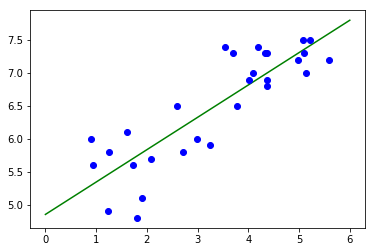

In [51]:
f_lr = lambda x: lin_reg.coef_[0][0] * x +lin_reg.intercept_[0]

x_f_lr = np.linspace(0., 6, 200)
y_f_lr = f_lr(x_f_lr)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(X_train, y_train, 'bo');
plt.show()

# Zad.
Wykonaj regresię za pomocą TensorFlow.

In [52]:
data_plus_bias  = np.c_[np.ones((X_train.shape[0], 1)), X_train]
data_m, data_n = data_plus_bias.shape
print(data_m, data_n)

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")

XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)
with tf.Session() as sess:
    theta_value = theta.eval()
    print(theta_value)

29 2
[[4.853052 ]
 [0.4911556]]


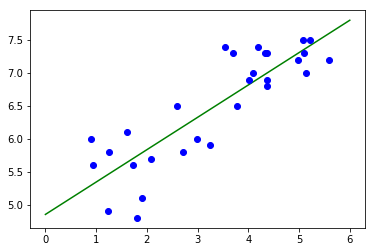

In [54]:
f_lr = lambda x: theta_value[1] * x + theta_value[0][0]

x_f_lr = np.linspace(0., 6, 200)
y_f_lr = f_lr(x_f_lr)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(X_train, y_train, 'bo');
plt.show()

# Implementing Gradient Descent

Możemy zminimalizować funkcję kosztu gradientowo wykorzystując gradient: 


```python
gradients = 2/m * tf.matmul(tf.transpose(X), error)
```

In [59]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")

y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/data_m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()
    print(best_theta)

Epoch 0 MSE = 19.612455
Epoch 100 MSE = 1.3545243
Epoch 200 MSE = 0.8315496
Epoch 300 MSE = 0.54158586
Epoch 400 MSE = 0.38081592
Epoch 500 MSE = 0.29167664
Epoch 600 MSE = 0.24225356
Epoch 700 MSE = 0.21485056
Epoch 800 MSE = 0.19965717
Epoch 900 MSE = 0.19123314
[[4.660542  ]
 [0.54031867]]


# Zad.

Proszę narysować wykres zmiany funkcji kosztu

In [61]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01
error_array=[]

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")

y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/data_m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        error_array.append(mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()
    print(best_theta)

Epoch 0 MSE = 19.612455
Epoch 100 MSE = 1.3545243
Epoch 200 MSE = 0.8315496
Epoch 300 MSE = 0.54158586
Epoch 400 MSE = 0.38081592
Epoch 500 MSE = 0.29167664
Epoch 600 MSE = 0.24225356
Epoch 700 MSE = 0.21485056
Epoch 800 MSE = 0.19965717
Epoch 900 MSE = 0.19123314
[[4.660542  ]
 [0.54031867]]


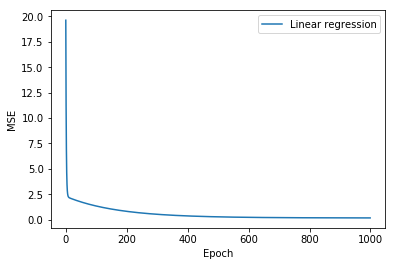

In [67]:
plt.figure()
plt.plot(error_array, label='Linear regression')
#plt.semilogy(error_array, label='Linear regression')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Automatyczne różniczkowanie

  * Aby zrozumieć dlaczego, rozważ funkcję 
$$
f (x) = exp (exp (exp (x))).
$$
  * Możesz obliczyć jej pochodną 
$$
f'(x) = exp (x) \cdot exp (exp (x)) \cdot exp (exp (exp (x))).
$$
  * Wydajnym rozwiązaniem będzie napisanie funkcji, 
    * która najpierw oblicza $exp (x)$, 
    * następnie $exp (exp (x))$, 
    * astępnie $exp (exp (exp (x)))$ 
    
  i zwraca wszystkie trzy. 
  * To daje Ci $f(x)$ bezpośrednio (trzeci człon), a jeśli potrzebujesz pochodnej możesz po prostu pomnożyć wszystkie trzy elemnty i gotowe.
  * Przy naiwnym podejściu musiałbyś wywołać funkcję $exp$ dziewięć razy, aby obliczyć zarówno $f(x)$, jak i $f'(x)$. Przy takim podejściu wystarczy wywołać to trzy razy.

# Zadanie
Można znaleźć pochodne cząstkowe poniższej funkcji w odniesieniu do a i b

```python
tf.gradients
```

In [68]:
def my_func(a, b):
    z = 0
    for i in range(100):
        z = a * np.cos(z + i) + z * np.sin(b - i)
    return z

my_func(0.2, 0.3)

-0.21253923284754914

In [69]:
tf.reset_default_graph()

a = tf.Variable(0.2, name="a")
b = tf.Variable(0.3, name="b")
z = tf.constant(0.0, name="z0")
for i in range(100):
    z = a * tf.cos(z + i) + z * tf.sin(b - i)

grads = tf.gradients(z, [a, b])
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    print(z.eval())
    print(sess.run(grads))

-0.21253741
[-1.1388494, 0.19671395]


# Zad

Możemy też użyć gradientu wyliczonego za pomocą automatycznego różniczkowania

```python
gradients = tf.gradients(mse, [theta])[0]
```


In [71]:
tf.reset_default_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")

y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

gradients = tf.gradients(mse, [theta])[0]

training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 19.612455
Epoch 100 MSE = 1.3545243
Epoch 200 MSE = 0.8315496
Epoch 300 MSE = 0.54158574
Epoch 400 MSE = 0.3808158
Epoch 500 MSE = 0.29167664
Epoch 600 MSE = 0.24225356
Epoch 700 MSE = 0.21485056
Epoch 800 MSE = 0.19965717
Epoch 900 MSE = 0.19123314
Best theta:
[[4.660542  ]
 [0.54031867]]
